# Search image in the Dataset

With this notebook you can search for photos using natural language.

## Load the dataset

You will need the Unsplash Dataset and the precomputed feature vetors for this. You don't want to process the whole dataset yourself, you can download the preprocessed feature vectors from [here](https://drive.google.com/drive/folders/1ozUUr8UQ2YWDSJyYIIun9V8Qg1TjqXEs?usp=sharing).

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

# Set the paths
photos_path = Path("featurescoop_salvatore") / "imgs"
features_path = Path("featurescoop_salvatore") / "features"

# List all JPGs in the folder
photos_files = list(photos_path.glob("*.jpg"))
photos_files.sort()

# Load the features and the corresponding IDs
photo_features = np.load(features_path / "features.npy")
photo_ids = pd.read_csv(features_path / "photo_ids.csv")
photo_ids = list(photo_ids['photo_id'])

Load the CLIP network.

In [2]:
import clip
import torch

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

## Search

Specify your search query and encode it to a feature vector using CLIP.

In [18]:
search_query = """
I can observe the world through the lenses of others. 
"""

with torch.no_grad():
    # Encode and normalize the description using CLIP
    text_encoded = model.encode_text(clip.tokenize(search_query).to(device))
    text_encoded /= text_encoded.norm(dim=-1, keepdim=True)

Compare the text features to the image features and find the best match.

In [19]:
# Retrieve the description vector and the photo vectors
text_features = text_encoded.cpu().numpy()

# Compute the similarity between the descrption and each photo using the Cosine similarity
similarities = (text_features @ photo_features.T).squeeze(0).tolist()

# Sort the photos by their similarity score
best_photos = sorted(zip(similarities, range(photo_features.shape[0])), key=lambda x: x[0], reverse=True)

## Display the results

Show the top 3 results.

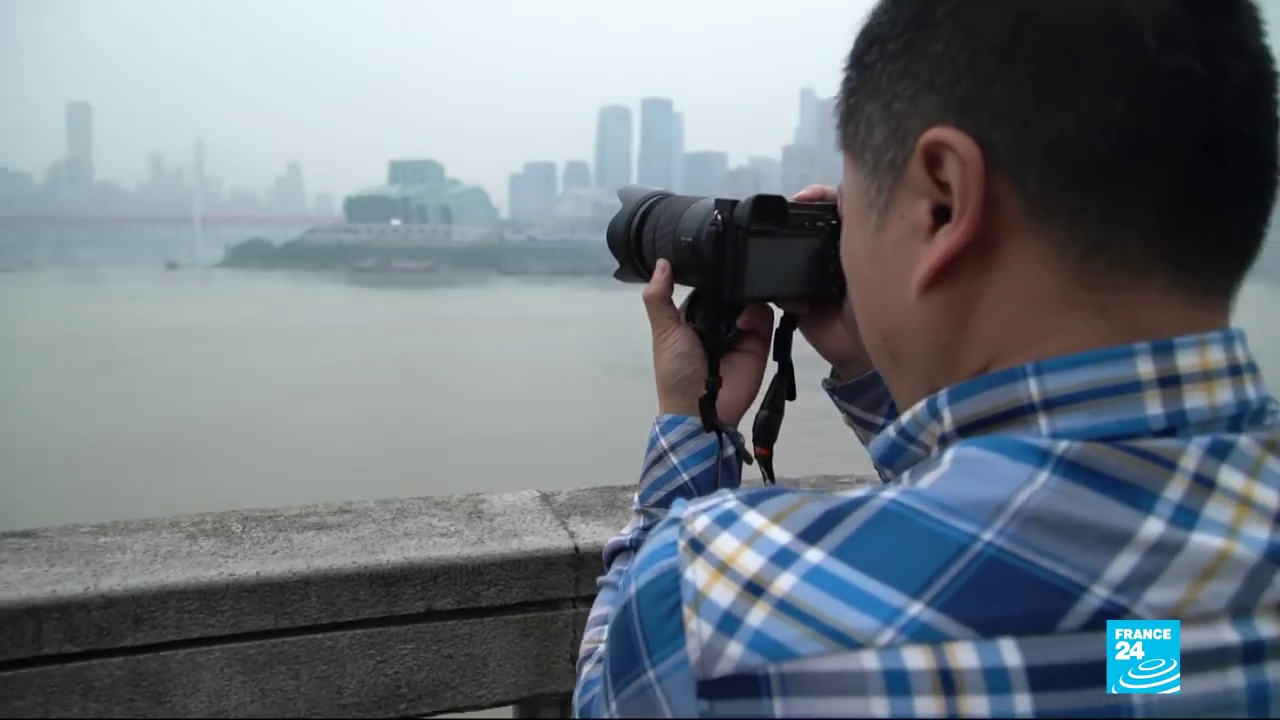

0.265625 8154 featurescoop_salvatore/imgs/mov23-Scene-050-01.jpg



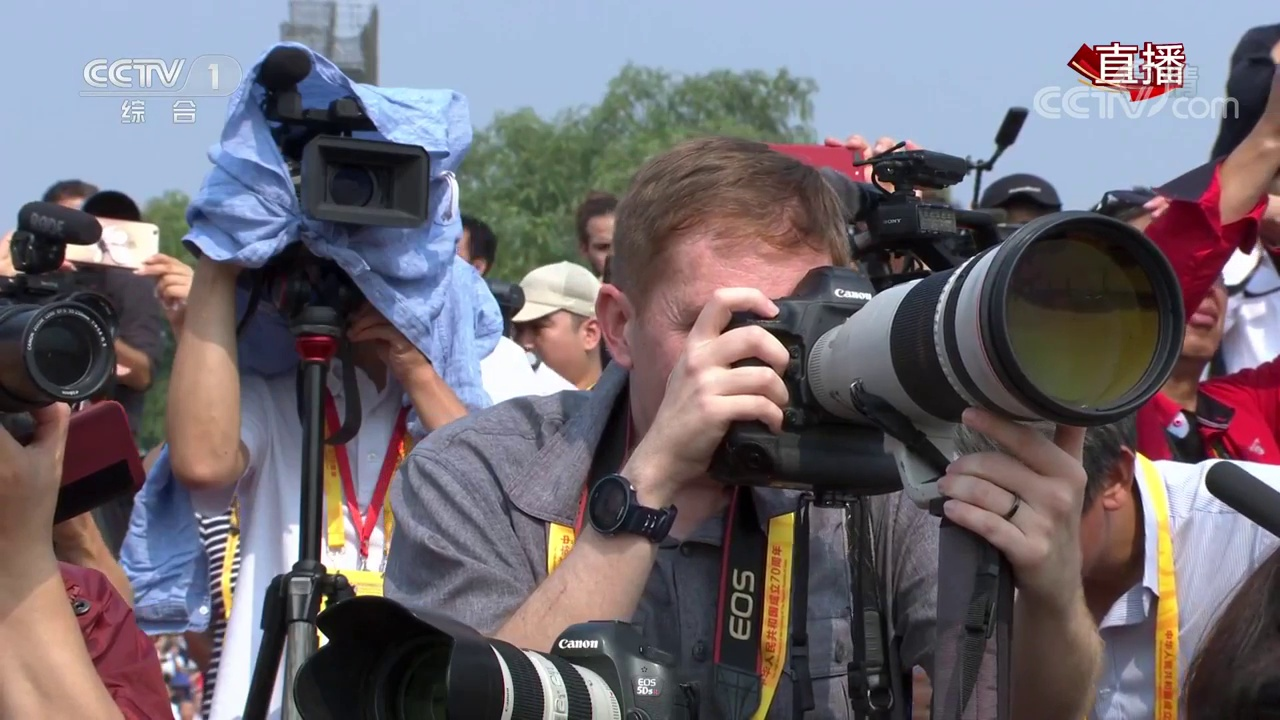

0.2646484375 15951 featurescoop_salvatore/imgs/mov98-Scene-054-01.jpg



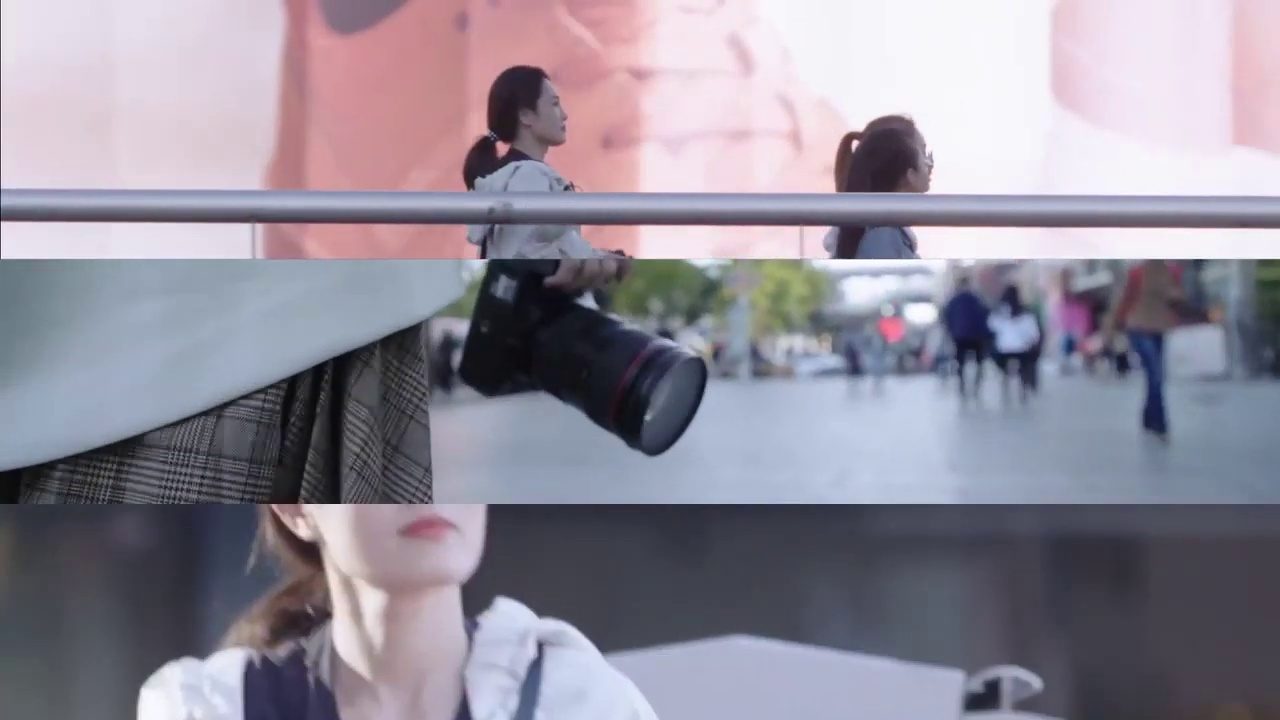

0.2626953125 3795 featurescoop_salvatore/imgs/mov117-Scene-119-01.jpg



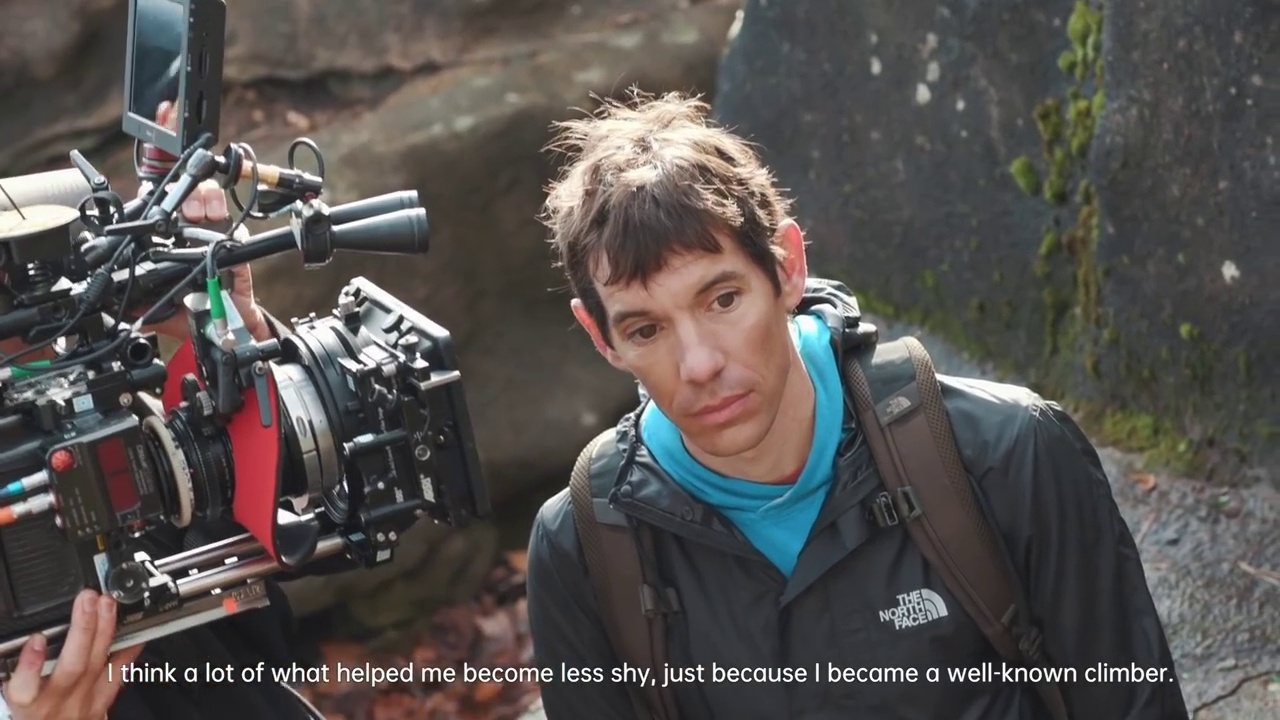

0.2578125 13237 featurescoop_salvatore/imgs/mov342-Scene-005-01.jpg



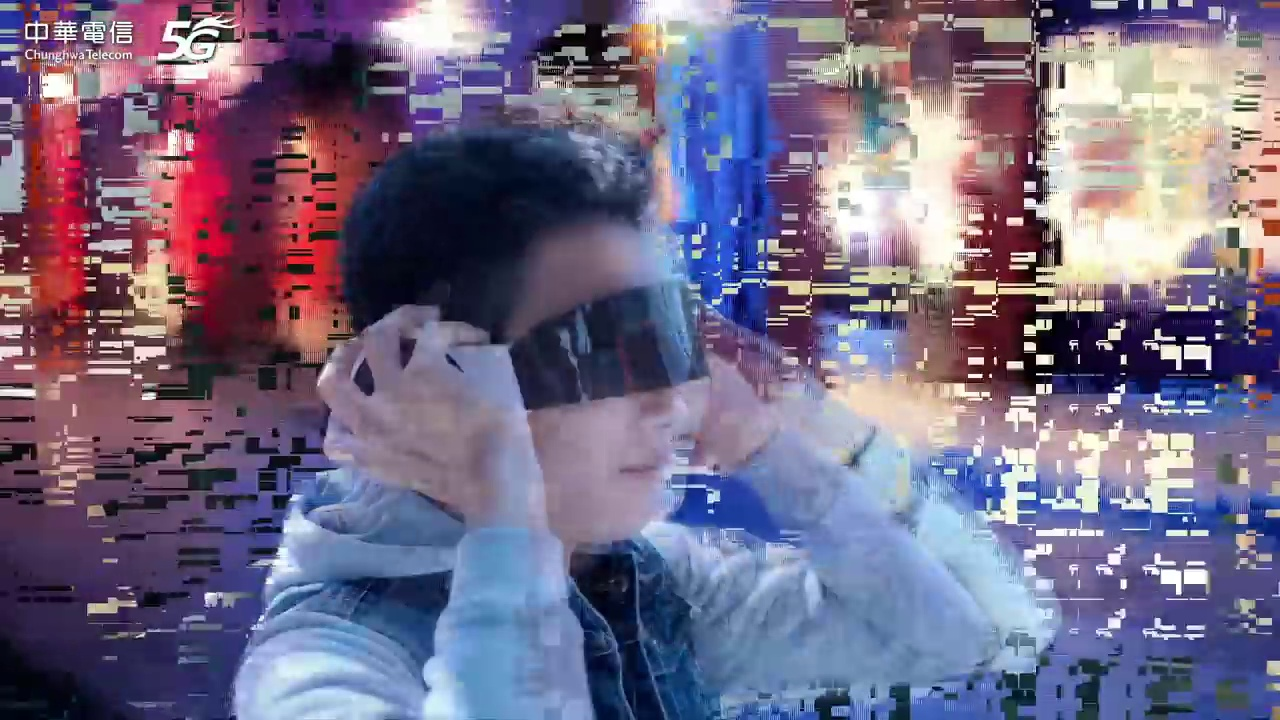

0.25634765625 13923 featurescoop_salvatore/imgs/mov374-Scene-021-01.jpg



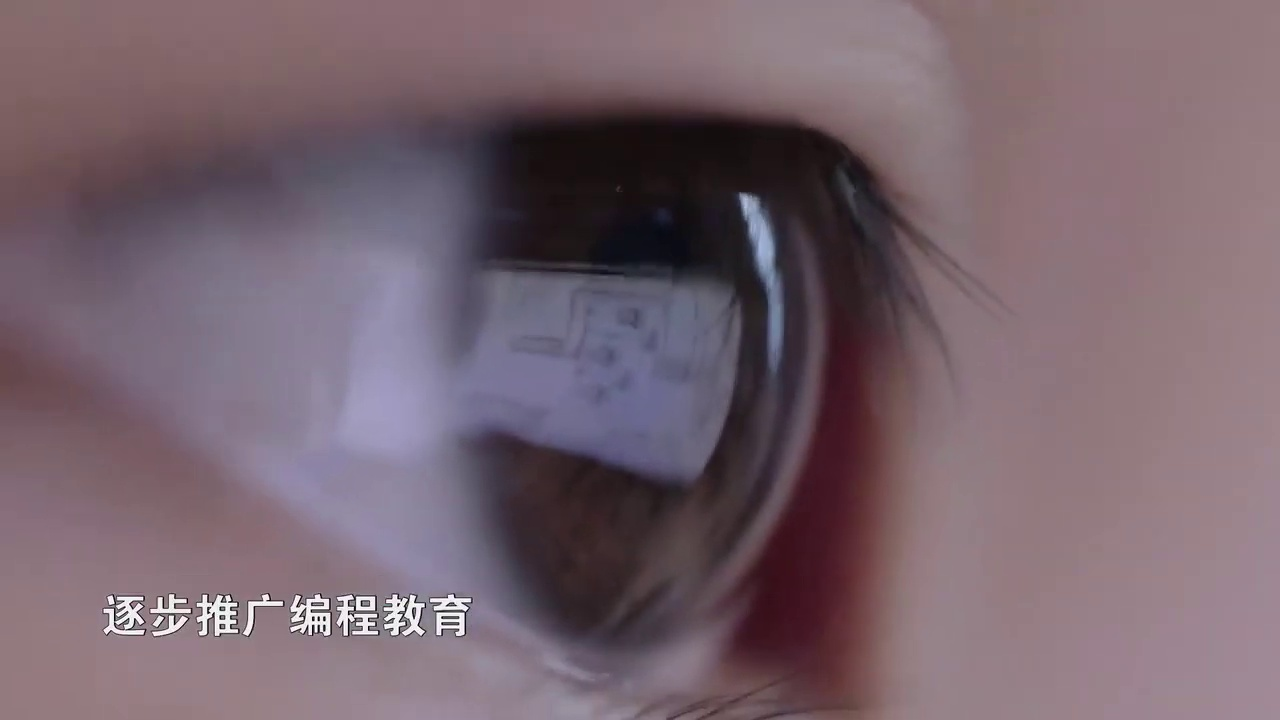

0.255859375 4469 featurescoop_salvatore/imgs/mov119-Scene-132-01.jpg



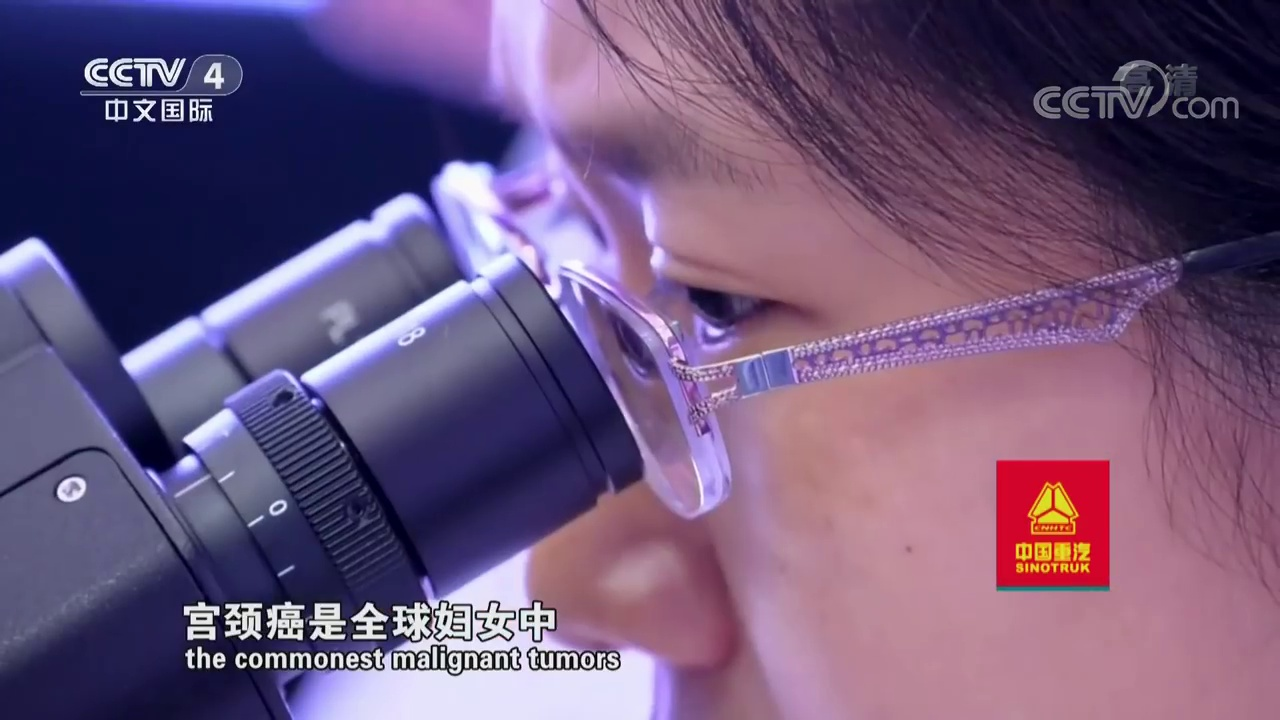

0.25537109375 1718 featurescoop_salvatore/imgs/mov110-Scene-295-01.jpg



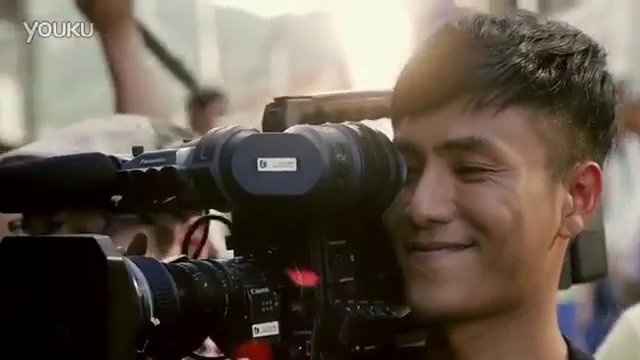

0.2529296875 14485 featurescoop_salvatore/imgs/mov400-Scene-006-01.jpg



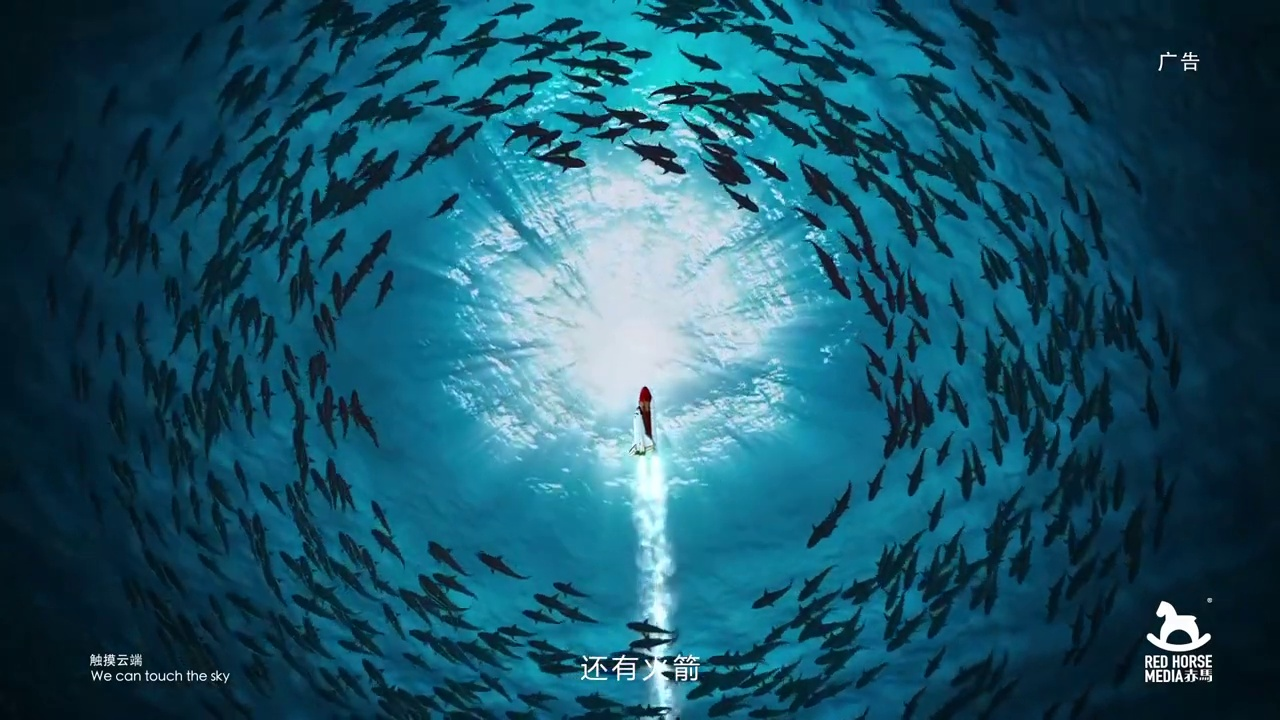

0.251220703125 13497 featurescoop_salvatore/imgs/mov359-Scene-009-01.jpg



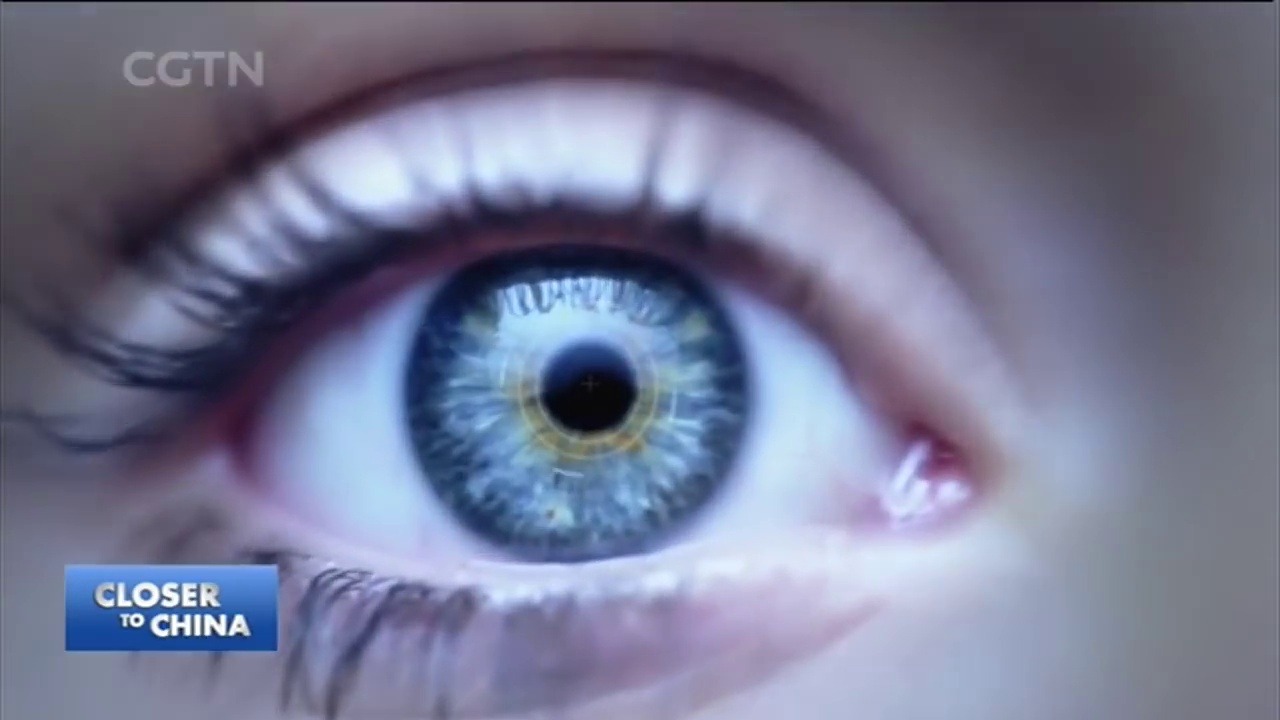

0.2509765625 1292 featurescoop_salvatore/imgs/mov109-Scene-075-01.jpg



In [20]:
from IPython.display import Image
from IPython.core.display import HTML

# Iterate over the top 3 results
for i in range(10):
    # Retrieve the photo ID
    pct, idx = best_photos[i]
    photo_id = photo_ids[idx]

    # Display the photo
    display(Image(photos_files[idx]))
    print(pct, idx, photos_files[idx])

    # Display the attribution text
    print()

In [36]:
import json
print(type(best_photos[0]), best_photos[0])

mytuple = best_photos[:10]
#convert to JSON string
jsonStr = json.dumps(mytuple)


<class 'tuple'> (0.28076171875, 12339)
